In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

/home/syang127/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Generate a dictionary mapping each actor/actress to a set of movies to which they performed,
# and generate a dictionary mapping each movie to a set of actors/actresses

movie_to_cast_hash = {}
cast_to_movies_hash = {}

counter = 0
with open('clean_cast_movies.txt','r') as cleansed:
    counter = 0
    for line in cleansed:
        if counter % 10000 == 0:
            print("%d" % (counter))
        line_split = line.split('\t\t')
        for n,i in enumerate(line_split):
            line_split[n] = line_split[n].rstrip()
        movies = set(line_split[1:])
        cast_name = line_split[0]
        cast_to_movies_hash[cast_name] = movies
        for m in movies:
            if m not in movie_to_cast_hash.keys():
                movie_to_cast_hash[m] = set ()
            movie_to_cast_hash[m].add(cast_name)
        counter += 1

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000


In [3]:
# Sanity check for actors -> set of movies
for n,i in enumerate(cast_to_movies_hash.keys()):
    if n > 2:
        break
    print("%s\n-------------------------------------------\n %s\n" %(i,cast_to_movies_hash[i]))

$hort, Too
-------------------------------------------
 {'Ghetto Physics (2010)', 'Rhyme & Reason (1997)', 'Uprising: Hip Hop and the LA Riots (2012)', 'Mac Dre: Legend of the Bay (2014)', 'Stop Pepper Palmer (2014)', 'Menace II Society (1993)', 'Pimpalation: Return of the Trill (2006)', 'Beats, Rhymes & Life: The Travels of a Tribe Called Quest (2011)', 'Townbiz (2010)', 'Porndogs: The Adventures of Sadie (2009)', 'Gangsta Rap: The Glockumentary (2007)', 'American Pimp (1999)'}

2 Live Crew
-------------------------------------------
 {"2 Live Crew: C'mon Babe (1990)", '2 Live Crew Feat. Ice-T: The Real One (1998)', 'The New 2 Live Crew: You Go Girl (1994)', 'Luke Feat. 2 Live Crew: Do the Bart (1990)', '2 Live Crew: The 2 Live Crew Mega Mix (1992)', "2 Live Crew: Shake a Lil Somethin' (1996)", 'A Family Underground (2009)', '2 Live Crew: Pop the Pussy (1991)', 'Luke Feat. 2 Live Crew: Banned in the U.S.A. (1990)', '2 Live Crew: Do the Damn Thing (1996)', '2 Live Crew: Me So Horny (19

In [4]:
# Sanity check for actors -> set of movies
for n,i in enumerate(movie_to_cast_hash.keys()):
    if n > 2:
        break
    print("%s\n-------------------------------------------\n %s\n" %(i,movie_to_cast_hash[i]))

Ghetto Physics (2010)
-------------------------------------------
 {'McKinney, Cynthia', 'Ice-T', 'Hayes, Janeline', 'Duong, Alex (I)', 'Lear, Norman', 'Garza, Leslie', '$hort, Too', 'Davis, Eurydice', 'Revelle, Sabrina', 'Reed, Shanequa', 'West, Cornel', 'KRS-One', 'LeGault, Mary', 'Koppel, Kellie', 'Ward, Vincent M.', 'Foy, Mike (I)', 'LÃ³pez, Eder'}

Rhyme & Reason (1997)
-------------------------------------------
 {'P, Master', 'Blow, Kurtis', 'Combs, Sean', 'Mack 10', 'Rhymes, Busta', 'Ice-T', 'D., Chuck', 'Man, Method', 'Q-Tip (I)', 'Raekwon', 'Reyes, Senen', 'Nas', 'RZA', 'Notorious B.I.G., The', '$hort, Too', 'Heavy D (I)', 'E-40', 'KRS-One', 'Dr. Dre', 'Hill, Lauryn', 'Redman', 'B-Real', 'Shakur, Tupac', 'Caz, Grandmaster', 'Jean, Wyclef'}

Uprising: Hip Hop and the LA Riots (2012)
-------------------------------------------
 {'Nas', 'Ice-T', '$hort, Too', 'Hall, Arsenio', 'Kurupt', 'KRS-One', 'Cube, Ice', 'Singleton, John (I)'}



Bamma Maata Bangaru Baata (1990): 7.500000
The 61st Annual Golden Globe Awards (2004): 5.100000
Con la música a otra parte (1975): 3.400000
Funeralii fericite (2013): 8.100000
Zoom, Zoom, Superman! (1973): 5.600000
Fever Lake (1996): 2.900000
El aroma del Copal (1997): 4.200000
The Time Machine (1978): 5.400000
The Science of Doctor Who (2012): 8.200000
Section 60: Arlington National Cemetery (2008): 7.300000
Svobodna si. Odloci se. (2000): 6.700000


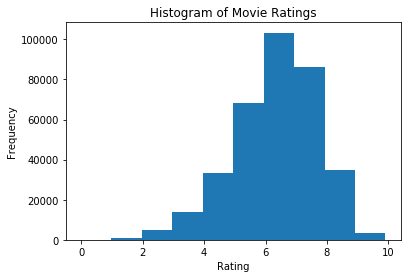

In [5]:
# Read in movie ratings
movie_to_rating_hash = {}
with open('movie_rating.txt','r',encoding = "ISO-8859-1") as f:
    counter = 0
    for line in f:
        line_split = line.split('\t\t')
        movie_title = line_split[0]
        movie_rating = float(line_split[1])
        movie_to_rating_hash[movie_title] = movie_rating
        
for n,i in enumerate(movie_to_rating_hash.keys()):
    if n > 10:
        break
    print("%s: %f" % (i,movie_to_rating_hash[i]))

plt.hist(movie_to_rating_hash.values())
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.title('Histogram of Movie Ratings')
plt.show()

In [6]:
# For each actor, calculate the mean rating of the movies they were in
actor_ratings = {}
for actor in cast_to_movies_hash.keys():
    sum_rating = 0
    movie_rating_count = 0
    movies = cast_to_movies_hash[actor]
    #rating_list = []
    for movie in movies:
        if movie in movie_to_rating_hash.keys():
            #rating_list.append(movie_to_rating_hash[movie])
            sum_rating += movie_to_rating_hash[movie]
            movie_rating_count += 1
    #rating_list = sorted(rating_list,reverse=True)
    if movie_rating_count > 0:
        mean_rating = sum_rating / (movie_rating_count)
        actor_ratings[actor] = mean_rating

$hort, Too: 6.511111
2 Live Crew: 5.900000
50 Cent: 6.003226
A., Sergey: 7.588462
A.S., Alwi: 2.000000
A.V., Subba Rao: 6.822222
Aabel, Per (I): 6.160000
Aaker, Lee: 6.616667
Aaltonen, Kosti: 5.341667
Aaltonen, Remu: 5.685714
Aaltonen, Risto: 5.373333


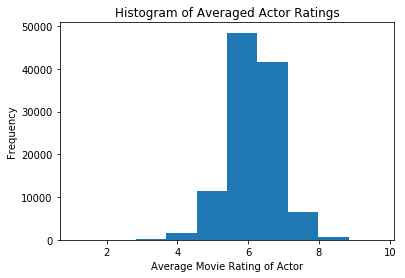

In [7]:
# Sanity check to visualize actor weights
for n,i in enumerate(actor_ratings.keys()):
    if n > 10:
        break
    print("%s: %f" %(i,actor_ratings[i]))
    
plt.hist(actor_ratings.values())
plt.ylabel('Frequency')
plt.xlabel('Average Movie Rating of Actor')
plt.title('Histogram of Averaged Actor Ratings')
plt.show()

In [8]:
# Now for each movie, generate a list of each actor's "weight"
movie_to_actor_weights = {}

for n,movie in enumerate(movie_to_cast_hash.keys()):
#     if n < 10000:
#         break
    weights = []
    for actor in movie_to_cast_hash[movie]:
        if actor in actor_ratings.keys():
            weights.append(actor_ratings[actor])
    if len(weights) > 4:
        movie_to_actor_weights[movie] = sorted(weights,reverse=True)


In [9]:
for n,i in enumerate(movie_to_actor_weights.keys()):
    if n > 10:
        break
    print(i + ": " + str(movie_to_actor_weights[i]) + "\n")

Ghetto Physics (2010): [7.5875, 6.9423076923076925, 6.8625, 6.847619047619046, 6.800000000000002, 6.542857142857144, 6.511111111111111, 6.388888888888888, 6.2727272727272725, 5.970000000000001, 5.841772151898736, 5.7375, 5.685714285714286, 5.657894736842106, 5.377777777777777, 5.152941176470589, 5.139999999999999]

Rhyme & Reason (1997): [7.25, 7.041666666666665, 7.03030303030303, 6.894444444444444, 6.862499999999999, 6.847619047619046, 6.779999999999999, 6.536363636363639, 6.53529411764706, 6.529411764705881, 6.511111111111111, 6.379999999999999, 6.343750000000001, 6.338461538461539, 6.279999999999999, 6.258823529411765, 6.233333333333333, 6.2125, 6.126666666666666, 6.1000000000000005, 6.066666666666665, 5.841772151898736, 5.7700000000000005, 5.604545454545453, 5.339999999999999]

Uprising: Hip Hop and the LA Riots (2012): [6.9818181818181815, 6.847619047619046, 6.806666666666667, 6.529411764705881, 6.511111111111111, 5.956410256410258, 5.841772151898736, 5.01]

Mac Dre: Legend of the

In [38]:
# Get max, 75th quartiles, median, 25th, and min
def get_100_75_50_25_0(sorted_weights):
    quartiles = np.zeros((4,))
    quartiles[0] = np.mean(sorted_weights)
    quartiles[1] = sorted_weights[round(len(sorted_weights)/4)]
    quartiles[2] = sorted_weights[round(len(sorted_weights)/2)]
    quartiles[3] = sorted_weights[round(3*len(sorted_weights)/4)]
    return quartiles

def get_100_75_50_25(sorted_weights):
    feature_vector = np.zeros((5,))
    feature_vector[0] = np.mean(sorted_weights)
    feature_vector[1] = sorted_weights[0] # max
    feature_vector[2] = sorted_weights[round(len(sorted_weights)/4)] # 75th
    feature_vector[3] = sorted_weights[round(len(sorted_weights)/2)] # median
    feature_vector[4] = sorted_weights[round(3*len(sorted_weights)/4)] # 25th
    return feature_vector

movie_list = list(movie_to_rating_hash.keys())

data_matrix = np.zeros((len(movie_to_rating_hash),5))
n = 0
for movie in movie_list:
    if movie in movie_to_actor_weights:
        weights = movie_to_actor_weights[movie]
        feature_vector = get_100_75_50_25_0(weights)
        data_matrix[n,0:len(feature_vector)] = feature_vector
        data_matrix[n,-1] = movie_to_rating_hash[movie]
        n+=1

data_matrix = data_matrix[:n,:]
split_index = round(0.8*len(data_matrix))
training_matrix = data_matrix[:split_index,:]
validation_matrix = data_matrix[split_index:,:]

In [42]:
validation_matrix.shape

(23639, 5)

In [40]:
def get_movie_weights(movie_title):
    actor_set = movie_to_cast_hash[movie_title]
    weights = []
    for actor in actor_set:
        if actor in actor_ratings.keys():
            weights.append(actor_ratings[actor])
    weights = sorted(weights,reverse=True)
    feature_vector = get_100_75_50_25_0(weights)
    return feature_vector

In [48]:
linear_model = LinearRegression()
linear_model.fit(X=training_matrix[:,:-1],y=training_matrix[:,-1])

rmse = mean_squared_error(training_matrix[:,-1], linear_model.predict(training_matrix[:,:-1]))
validation_rmse = mean_squared_error(validation_matrix[:,-1], linear_model.predict(validation_matrix[:,:-1]))
print("Train RMSE: %f" % rmse)

batman_pred = linear_model.predict([get_movie_weights('Batman v Superman: Dawn of Justice (2016)')])[0]
mission_imp_pred = linear_model.predict([get_movie_weights('Mission: Impossible - Rogue Nation (2015)')])[0]
minions_pred = linear_model.predict([get_movie_weights('Minions (2015)')])[0]

truth_ratings = np.array([6.6,7.4,6.4])
predicted_ratings = np.array([batman_pred,mission_imp_pred,minions_pred])
rmse = mean_squared_error(truth_ratings, predicted_ratings)
print("Batman Prediction: %f" % batman_pred)
print("Mission Impossible Prediction: %f" % mission_imp_pred)
print("Minions Prediction: %f" % minions_pred)

Train RMSE: 0.942210
Batman Prediction: 6.716945
Mission Impossible Prediction: 6.651890
Minions Prediction: 7.267045
